**Helpful Links: Where the Data Lives**

Open Academic Society: [Project Page](https://www.openacademic.ai/oag/)

Microsoft Research: [MS Academic Graph](https://www.microsoft.com/en-us/research/project/microsoft-academic-graph/)

In [1]:
import pandas as pd

In [2]:
data = pd.read_json('data/mag_papers_0/mag_papers_0.txt', lines=True)

In [3]:
data.shape

(1000000, 19)

In [4]:
data.columns

Index(['abstract', 'authors', 'doc_type', 'doi', 'fos', 'id', 'issue',
       'keywords', 'lang', 'n_citation', 'page_end', 'page_start', 'publisher',
       'references', 'title', 'url', 'venue', 'volume', 'year'],
      dtype='object')

In [5]:
# filter out non-English articles

model_df = data[data.lang == 'en']

In [6]:
model_df.shape

(522017, 19)

In [7]:
model_df.head()

,abstract,authors,doc_type,doi,fos,id,issue,keywords,lang,n_citation,page_end,page_start,publisher,references,title,url,venue,volume,year
0,A system and method for maskless direct write ...,NaN,NaN,NaN,"[Electronic engineering, Computer hardware, En...",0000002e-c2f2-4e25-9341-60d39130ac7a,NaN,NaN,en,NaN,NaN,NaN,NaN,"[354c172f-d877-4e60-a7eb-c1b1cf03ce4d, 76cf106...",System and Method for Maskless Direct Write Li...,[http://www.freepatentsonline.com/y2016/021111...,NaN,NaN,2015
1,NaN,[{'name': 'Ahmed M. Alluwaimi'}],NaN,10.4172/2157-7560.C1.030,"[Biology, Virology, Immunology, Microbiology]",0000003d-5ce0-4eed-a56f-bbd3f8d8242b,NaN,"[paratuberculosis, of, subspecies, proceedings...",en,NaN,NaN,NaN,OMICS International,NaN,The dilemma of the Mycobacterium avium subspec...,[http://www.omicsonline.org/proceedings/the-di...,NaN,NaN,2016
2,NaN,"[{'org': 'Weill Cornell Medical College, New Y...",Journal,10.1016/j.fertnstert.2015.07.492,NaN,00000061-0bab-468b-9481-de0c899783f3,3.0,NaN,en,NaN,NaN,NaN,Elsevier,NaN,Should endometriosis be an indication for intr...,[http://www.fertstert.org/article/S0015-0282(1...,Fertility and Sterility,104.0,2015
5,NaN,[{'name': 'George C. Sponsler'}],Journal,10.1063/1.3034711,NaN,000000a0-583a-486a-bb5b-38539503fa5c,1.0,NaN,en,NaN,15,13,American Institute of Physics,NaN,"Should APS Discuss Public Issues: Direct, pers...",[http://physicstoday.scitation.org/doi/abs/10....,Physics Today,21.0,1968
7,Full textFull text is available as a scanned c...,[{'name': 'M. T. Richards'}],NaN,NaN,"[Medicine, Pathology, Gynecology, Surgery]",000000d2-3acb-42cc-8f5d-cf92e7967f32,4.0,"[breast neoplasms, female, middle aged, adoles...",en,NaN,306,305,Canadian Medical Association,NaN,Breast surgery--as an office procedure,[http://www.cmaj.ca/content/109/4/305.citation...,Canadian Medical Association Journal,109.0,1973


In [58]:
# split a training set and a test set
#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(model_df, test_size=0.33, random_state=42)

# (1) raw data > algorithm w/ XKCD comic

## Content Based Recommendation using Jaccard Similarity(abstract, authors, fos, keywords, year, titles)

How to go about building a recommender system? 

Let's start simple + [steal like an artist](https://austinkleon.com/steal/). 

See the original, excellent examples from Joel Grus [Data Science from Scratch](https://github.com/joelgrus/data-science-from-scratch/blob/master/code-python3/recommender_systems.py).

In [19]:
import math, random
from collections import defaultdict, Counter

In [20]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def cosine_similarity(v, w):
    return dot(v, w) / math.sqrt(dot(v, v) * dot(w, w))

In [21]:
users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [22]:
popular_interests = Counter(interest
                            for user_interests in users_interests
                            for interest in user_interests).most_common()

def most_popular_new_interests(user_interests, max_results=5):
    suggestions = [(interest, frequency)
                   for interest, frequency in popular_interests
                   if interest not in user_interests]
    return suggestions[:max_results]

In [23]:
unique_interests = sorted(list({ interest
                                 for user_interests in users_interests
                                 for interest in user_interests }))

In [24]:
def make_user_interest_vector(user_interests):
    """given a list of interests, produce a vector whose i-th element is 1
    if unique_interests[i] is in the list, 0 otherwise"""
    return [1 if interest in user_interests else 0
            for interest in unique_interests]

user_interest_matrix = list(map(make_user_interest_vector, users_interests))

In [25]:
#
# Item-Based Collaborative Filtering
#

interest_user_matrix = [[user_interest_vector[j]
                         for user_interest_vector in user_interest_matrix]
                        for j, _ in enumerate(unique_interests)]

interest_similarities = [[cosine_similarity(user_vector_i, user_vector_j)
                          for user_vector_j in interest_user_matrix]
                         for user_vector_i in interest_user_matrix]

def most_similar_interests_to(interest_id):
    similarities = interest_similarities[interest_id]
    pairs = [(unique_interests[other_interest_id], similarity)
             for other_interest_id, similarity in enumerate(similarities)
             if interest_id != other_interest_id and similarity > 0]
    return sorted(pairs,
                  key=lambda pair: pair[1],
                  reverse=True)

In [26]:
def item_based_suggestions(user_id, include_current_interests=False):
    suggestions = defaultdict(float)
    user_interest_vector = user_interest_matrix[user_id]
    for interest_id, is_interested in enumerate(user_interest_vector):
        if is_interested == 1:
            similar_interests = most_similar_interests_to(interest_id)
            for interest, similarity in similar_interests:
                suggestions[interest] += similarity

    suggestions = sorted(suggestions.items(),
                         key=lambda pair: pair[1],
                         reverse=True)

    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight)
                for suggestion, weight in suggestions
                if suggestion not in users_interests[user_id]]

In [27]:
if __name__ == "__main__":

    print("Popular Interests")
    print(popular_interests)
    print()

    print("Most Popular New Interests")
    print("already like:", ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"])
    print(most_popular_new_interests(["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"]))
    print()
    print("already like:", ["R", "Python", "statistics", "regression", "probability"])
    print(most_popular_new_interests(["R", "Python", "statistics", "regression", "probability"]))
    print()

    print("Item based similarity")
    print("most similar to 'Big Data'")
    print(most_similar_interests_to(0))
    print()

    print("suggestions for user 0")
    print(item_based_suggestions(0))

Popular Interests
[('R', 4), ('Python', 4), ('regression', 3), ('Java', 3), ('statistics', 3), ('probability', 3), ('HBase', 3), ('Big Data', 3), ('Hadoop', 2), ('MongoDB', 2), ('deep learning', 2), ('libsvm', 2), ('machine learning', 2), ('C++', 2), ('pandas', 2), ('Postgres', 2), ('Cassandra', 2), ('statsmodels', 2), ('artificial intelligence', 2), ('scikit-learn', 2), ('neural networks', 2), ('Spark', 1), ('NoSQL', 1), ('scipy', 1), ('MySQL', 1), ('MapReduce', 1), ('Mahout', 1), ('numpy', 1), ('Haskell', 1), ('Storm', 1), ('mathematics', 1), ('support vector machines', 1), ('programming languages', 1), ('databases', 1), ('theory', 1), ('decision trees', 1)]

Most Popular New Interests
already like: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
[('R', 4), ('Python', 4), ('regression', 3), ('Java', 3), ('statistics', 3)]

already like: ['R', 'Python', 'statistics', 'regression', 'probability']
[('Java', 3), ('HBase', 3), ('Big Data', 3), ('Hadoop', 2), ('MongoDB', 2)]

Item b

# (2) a few features, pipe, outcome

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook

In [11]:
model_df['year'].tail()

999993    1998
999994    2014
999995    2010
999996    1970
999998    2010
Name: year, dtype: int64

In [12]:
print("Year spread: ", model_df['year'].min()," - ", model_df['year'].max())
print("Quantile spread:\n", model_df['year'].quantile([0.25, 0.5, 0.75]))

Year spread:  1800  -  2017
Quantile spread:
 0.25    1990.0
0.50    2005.0
0.75    2012.0
Name: year, dtype: float64


<IPython.core.display.Javascript object>


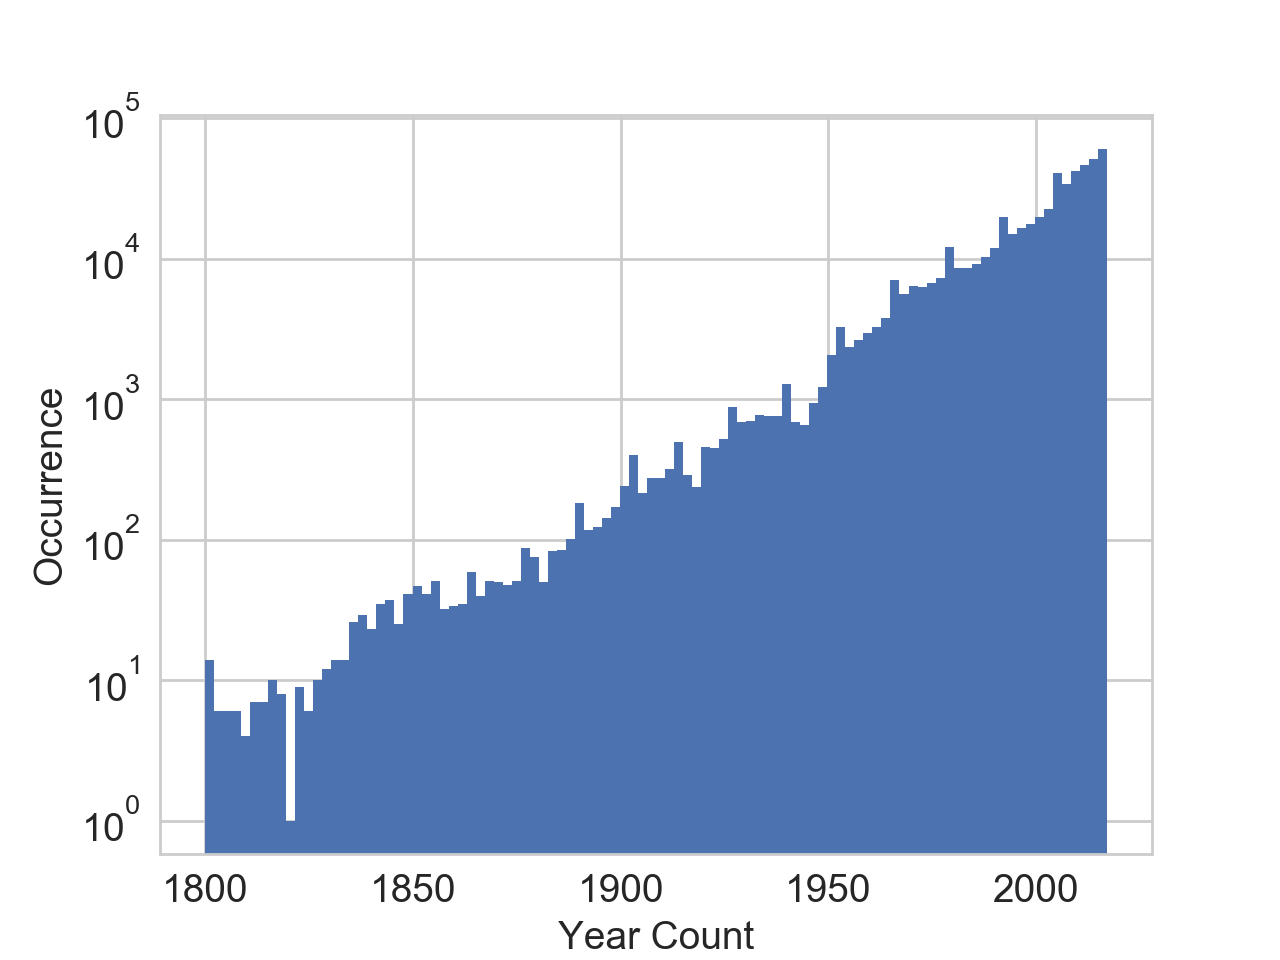

In [13]:
# plot years to see the distribution
sns.set_style('whitegrid')
fig, ax = plt.subplots()
model_df['year'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Year Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## years: binning + dummy encoding

In [ ]:
# insert binning here (by 10 years)

In [131]:
model_df['year'].head()

0    2015
1    2016
2    2015
5    1968
7    1973
Name: year, dtype: int64

In [135]:
X_year = pd.get_dummies(model_df['year'])
X_year.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## abstract: stopwords, frequency based filtering (tf-idf?)

In [136]:
# need to fill in NaN for sklearn
# is this needed > YES!
abstract_df = model_df.fillna('None')

In [137]:
# abstract: stopwords, frequency based filtering (tf-idf?)
abstract_df['abstract'].head()

0    A system and method for maskless direct write ...
1                                                 None
2                                                 None
5                                                 None
7    Full textFull text is available as a scanned c...
Name: abstract, dtype: object

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
X_abstract = vectorizer.fit_transform(abstract_df['abstract'])

In [140]:
X_abstract

<522017x524218 sparse matrix of type '<class 'numpy.float64'>'
	with 18710406 stored elements in Compressed Sparse Row format>

In [141]:
print("n_samples: %d, n_features: %d" % X_abstract.shape)

n_samples: 522017, n_features: 524218


# (3) a few more features, pipe, outcome

## authors: One-Hot Encoding using sklearn DictVectorizer()

In [54]:
authors_df = pd.DataFrame(model_df.authors)
authors_df.head()

,authors
0,NaN
1,[{'name': 'Ahmed M. Alluwaimi'}]
2,"[{'org': 'Weill Cornell Medical College, New Y..."
5,[{'name': 'George C. Sponsler'}]
7,[{'name': 'M. T. Richards'}]


In [55]:
import json

In [58]:
type(authors_df.authors[5][0])

dict

In [99]:
authors_list = []

for row in authors_df.itertuples():
    # create a dictionary from each Series index
    if type(row.authors) is list:
        # add these keys + values to our running dictionary    
        y = dict.fromkeys(row.authors[0].values(), row.Index)
        authors_list.append(y)

In [124]:
authors_list[0:5]

[{'Ahmed M. Alluwaimi': 1},
 {'Jovana P. Lekovich': 2, 'Weill Cornell Medical College, New York, NY': 2},
 {'George C. Sponsler': 5},
 {'M. T. Richards': 7},
 {'Donald L. Baxter': 8}]

In [127]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = authors_list
X = v.fit_transform(D)

In [126]:
X[0:5]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## fields of study: Feature Hashing?

In [134]:
model_df['fos'].head()

0    [Electronic engineering, Computer hardware, En...
1        [Biology, Virology, Immunology, Microbiology]
2                                                 None
5                                                 None
7           [Medicine, Pathology, Gynecology, Surgery]
Name: fos, dtype: object

In [91]:
len(authors_dict)

640694

In [130]:
pd.get_dummies(model_df['fos'][1])

,Biology,Immunology,Microbiology,Virology
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0


## titles: noun phrases + chunking

In [139]:
model_df['title'].head()

0    System and Method for Maskless Direct Write Li...
1    The dilemma of the Mycobacterium avium subspec...
2    Should endometriosis be an indication for intr...
5    Should APS Discuss Public Issues: Direct, pers...
7               Breast surgery--as an office procedure
Name: title, dtype: object

# (4) a few more...does that help? results? performance?
### no? okay. return to best case. all about experimentation.

## keywords: stemming?

In [137]:
model_df['keywords'].head()

0                                                 None
1    [paratuberculosis, of, subspecies, proceedings...
2                                                 None
5                                                 None
7    [breast neoplasms, female, middle aged, adoles...
Name: keywords, dtype: object

**Citations**

Jie Tang, Jing Zhang, Limin Yao, Juanzi Li, Li Zhang, and Zhong Su. ArnetMiner: Extraction and Mining of Academic Social Networks. In Proceedings of the Fourteenth ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (SIGKDD’2008). pp.990-998. [PDF](http://keg.cs.tsinghua.edu.cn/jietang/publications/KDD08-Tang-et-al-ArnetMiner.pdf) [Slides](http://keg.cs.tsinghua.edu.cn/jietang/publications/KDD08-Tang-et-al-Arnetminer.ppt) [System](http://aminer.org/) [API](http://aminer.org/RESTful_service)

Arnab Sinha, Zhihong Shen, Yang Song, Hao Ma, Darrin Eide, Bo-June (Paul) Hsu, and Kuansan Wang. 2015. An Overview of Microsoft Academic Service (MAS) and Applications. In Proceedings of the 24th International Conference on World Wide Web (WWW ’15 Companion). ACM, New York, NY, USA, 243-246. [PDF](https://www.microsoft.com/en-us/research/publication/an-overview-of-microsoft-academic-service-mas-and-applications-2/) [System](https://academic.microsoft.com/) [API](https://docs.microsoft.com/en-us/azure/cognitive-services/academic-knowledge/home)